<a href="https://colab.research.google.com/github/rajiul123/hr_project/blob/main/hr_prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [97]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [99]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


# Observations
* The dataset contains 10 columns and 14,999 rows.
* There is no null value in the dataset.
* The dataset contains three types of data: Float, Integer and Object
* "left" column is our target.
* We have to develop a model that'll be able to predict whether an employee will leave the company in future and which parameters will have impact on his/her decision
* So this is a classification problem as we have to find "Yes/No" type answer.

# Checking the data

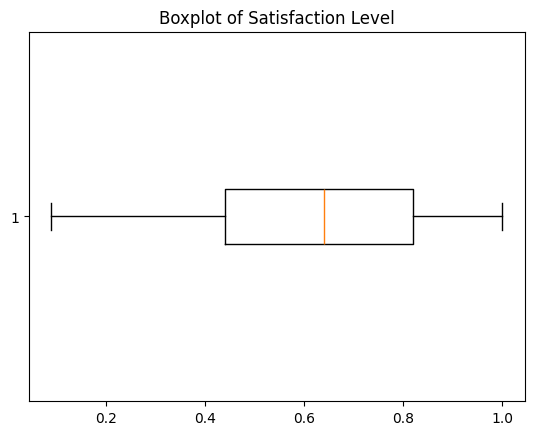

In [100]:
plt.boxplot(df["satisfaction_level"], vert=False)
plt.title("Boxplot of Satisfaction Level");

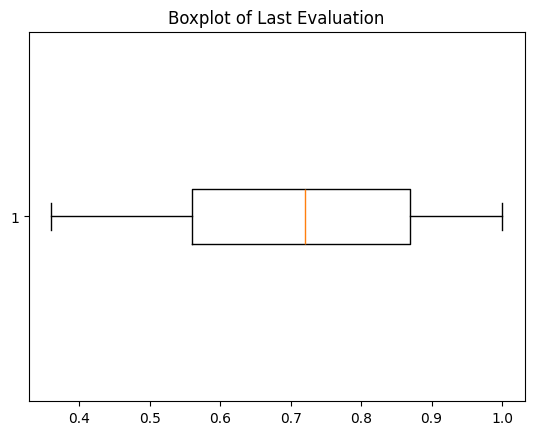

In [101]:
plt.boxplot(df["last_evaluation"], vert=False)
plt.title("Boxplot of Last Evaluation");

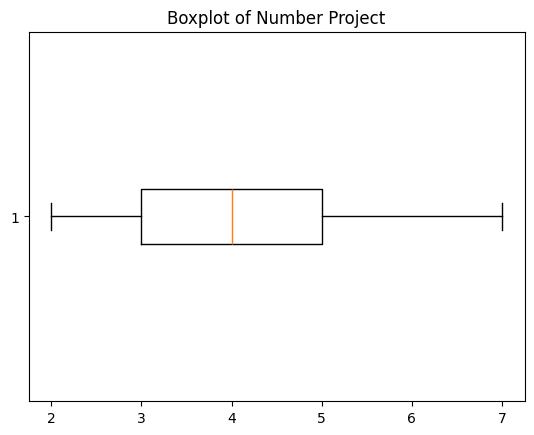

In [102]:
plt.boxplot(df["number_project"], vert=False)
plt.title("Boxplot of Number Project");

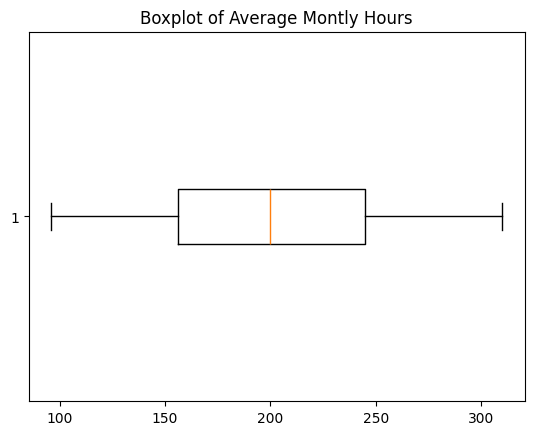

In [103]:
plt.boxplot(df["average_montly_hours"], vert=False)
plt.title("Boxplot of Average Montly Hours");

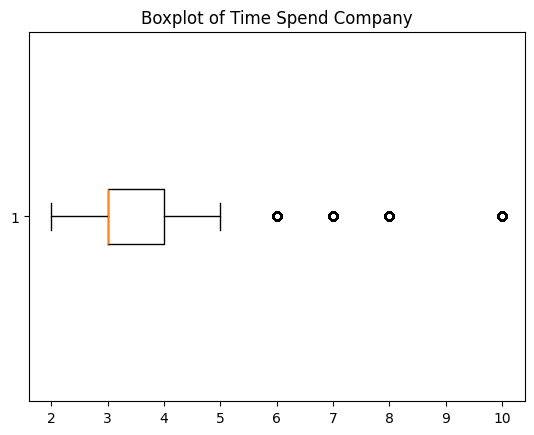

In [104]:
plt.boxplot(df["time_spend_company"], vert=False)
plt.title("Boxplot of Time Spend Company");

# Observation
* The boxplots showing that there is no outlier in the dataset
* Though the boxplot of "Time Spend" column showing some outliers but it's normal to spend 10 hours on an average at workplace due to workload and responsibilities. Though according to international standard, average working hour should not be more than 8 hours

# Exploratory Data Analisys

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [106]:
# cheking the "left" column
df["left"].value_counts()

,count
left,
0,11428
1,3571


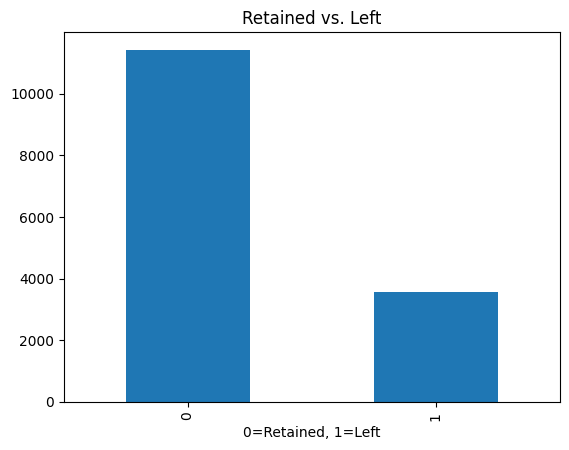

In [107]:
df["left"].value_counts().plot(kind="bar")
plt.xlabel("0=Retained, 1=Left")
plt.title("Retained vs. Left");

# Observation
* The company had 14,999 employees
* 3,571 employees has left the company

In [108]:
# checking salary column
df.salary.value_counts()

,count
salary,
low,7316
medium,6446
high,1237


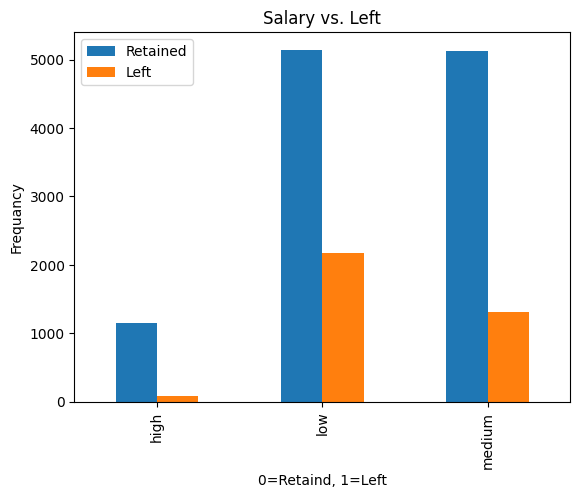

In [109]:
pd.crosstab(df.salary, df.left).plot(kind="bar")
plt.title("Salary vs. Left")
plt.xlabel("0=Retaind, 1=Left")
plt.ylabel("Frequancy")
plt.legend(["Retained", "Left"]);

In [110]:
df.groupby("salary")["left"].value_counts()

salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
Name: count, dtype: int64

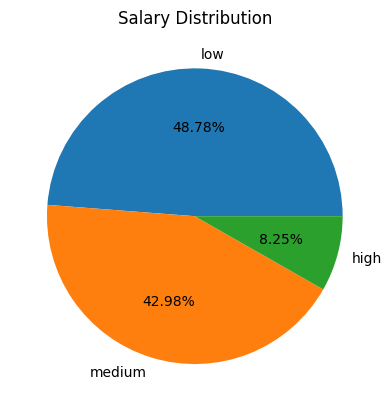

In [111]:
plt.pie(df.salary.value_counts(), labels=df.salary.value_counts().index, autopct="%0.02f%%")
plt.title("Salary Distribution");

# Observations
* The company has highest number of employees in 'low income' category
* The company has lowest number of employees in 'high income' category
* The tendency to leave the company is higher among low paid employees
* The tendency to leave the company is lowest among high paid employees

In [112]:
df.Department.value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


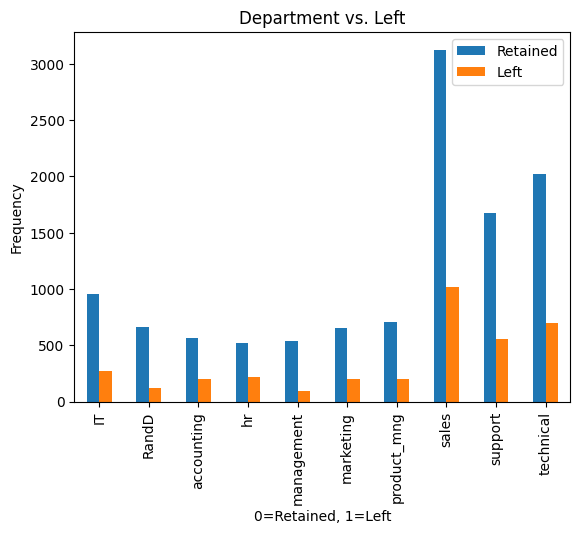

In [113]:
pd.crosstab(df.Department, df.left).plot(kind="bar")
plt.title("Department vs. Left")
plt.xlabel("0=Retained, 1=Left")
plt.ylabel("Frequency")
plt.legend(["Retained", "Left"]);

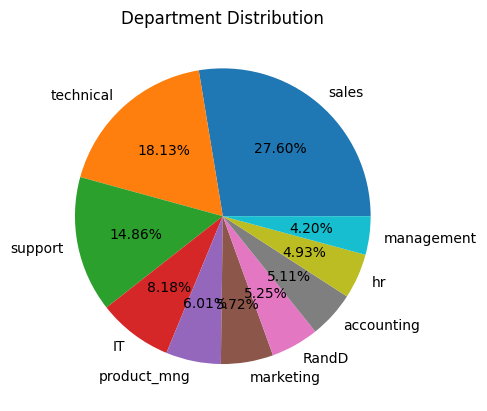

In [114]:
plt.pie(df.Department.value_counts(), labels=df.Department.value_counts().index, autopct="%0.02f%%")
plt.title("Department Distribution");

In [115]:
df.groupby("Department")["left"].value_counts()

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: count, dtype: int64

# Observations
* Sales department has the highest number of employees.
* In the case of leaving the company Sales department is also on top among other departments.
* HR department has the lowest number of employees
* In the case of leaving the company Management department is at the bottom among other departments.

In [116]:
df.groupby("number_project")["left"].value_counts()

number_project  left
2               1       1567
                0        821
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               1        655
                0        519
7               1        256
Name: count, dtype: int64

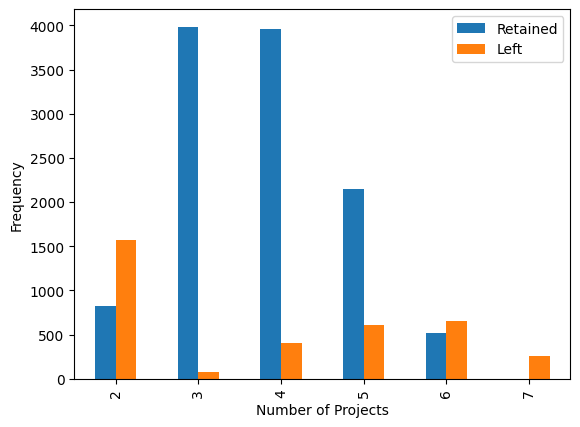

In [117]:
pd.crosstab(df.number_project, df.left).plot(kind="bar")
plt.xlabel("Number of Projects")
plt.ylabel("Frequency")
plt.legend(["Retained", "Left"]);

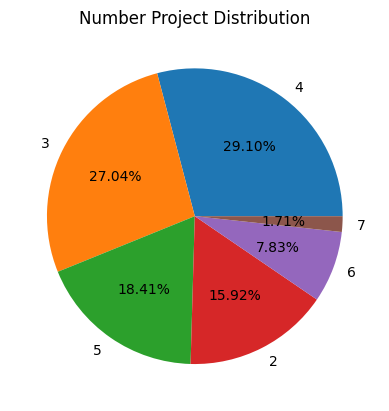

In [118]:
plt.pie(df.number_project.value_counts(), labels=df.number_project.value_counts().index, autopct="%0.02f%%")
plt.title("Number Project Distribution");

# Observations
* The employees who have done 2 projects, number of leaving the company is highest among them. leaving rate also highest among them (almost 150%)
* The employees who have done 7 projects, leaving rate is 100% among them
* The employees who have done 6 projects, leaving rate is little more than 100% among them
* The employees who have done 3 projects, leaving rate is lowest among them. This category includes maximum number of employees.
* Maximum employees have done 4 projects

In [119]:
df.groupby("time_spend_company")["left"].value_counts()

time_spend_company  left
2                   0       3191
                    1         53
3                   0       4857
                    1       1586
4                   0       1667
                    1        890
5                   1        833
                    0        640
6                   0        509
                    1        209
7                   0        188
8                   0        162
10                  0        214
Name: count, dtype: int64

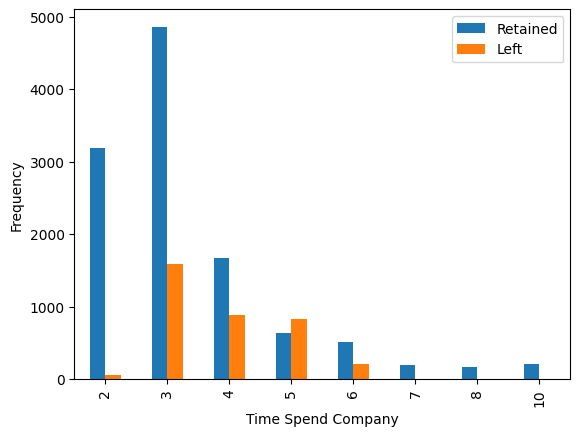

In [120]:
pd.crosstab(df.time_spend_company, df.left).plot(kind="bar")
plt.xlabel("Time Spend Company")
plt.ylabel("Frequency")
plt.legend(["Retained", "Left"]);

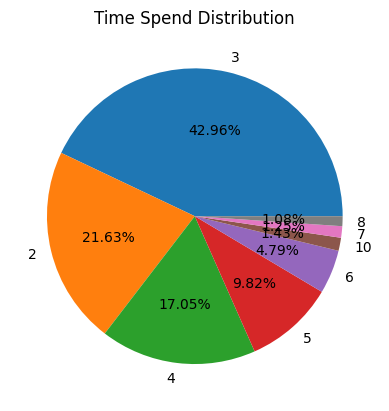

In [121]:
plt.pie(df.time_spend_company.value_counts(), labels=df.time_spend_company.value_counts().index, autopct="%0.02f%%")
plt.title("Time Spend Distribution");

# Observations
* Maximum number of employees have spent 3 hours at workplace. This type of employees have left the company most
* The employees who have spend 7, 8 and 10 hours, they have not left
* The employees who have spend 2 hours, count to leave the company is lower among them

In [122]:
df.groupby("Work_accident")["left"].value_counts()

Work_accident  left
0              0       9428
               1       3402
1              0       2000
               1        169
Name: count, dtype: int64

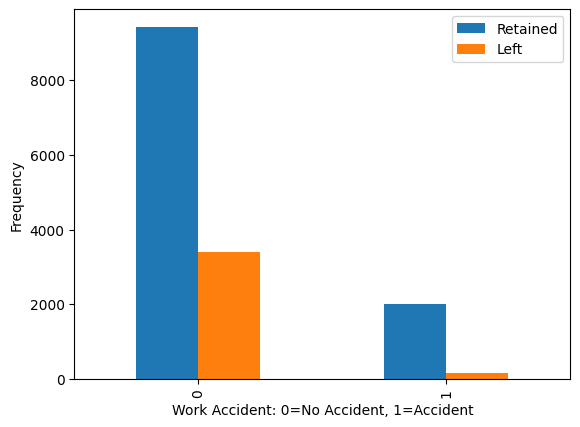

In [123]:
pd.crosstab(df.Work_accident, df.left).plot(kind="bar")
plt.xlabel("Work Accident: 0=No Accident, 1=Accident")
plt.ylabel("Frequency")
plt.legend(["Retained", "Left"]);

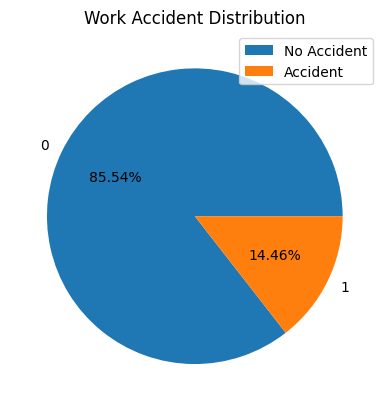

In [124]:
plt.pie(df.Work_accident.value_counts(), labels=df.Work_accident.value_counts().index, autopct="%0.02f%%")
plt.legend(["No Accident", "Accident"])
plt.title("Work Accident Distribution");

# Observations
* 14.46% of employees were victims of Workplace Accidents
* Number of leaving the company is higher among the employees who have not faced any accident

In [125]:
df.groupby("promotion_last_5years")["left"].value_counts()

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: count, dtype: int64

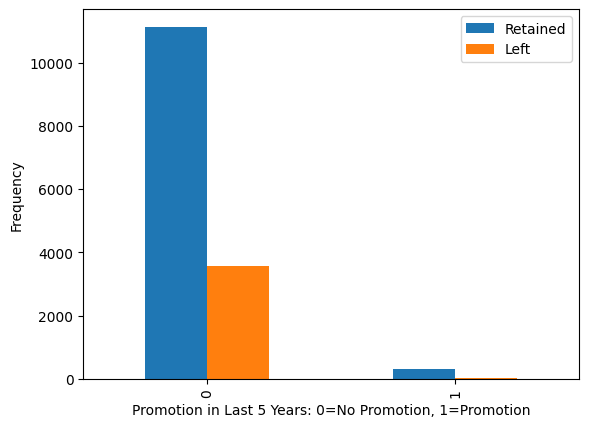

In [126]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind="bar")
plt.xlabel("Promotion in Last 5 Years: 0=No Promotion, 1=Promotion")
plt.ylabel("Frequency")
plt.legend(["Retained", "Left"]);

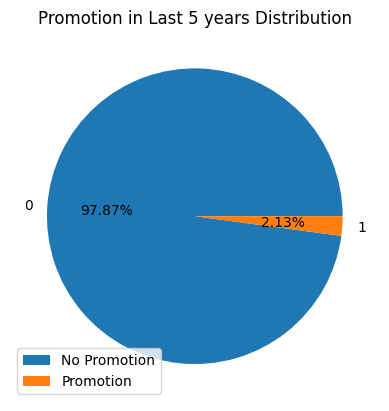

In [127]:
plt.pie(df.promotion_last_5years.value_counts(), labels=df.promotion_last_5years.value_counts().index, autopct="%0.02f%%")
plt.legend(["No Promotion", "Promotion"])
plt.title("Promotion in Last 5 years Distribution");

# Observations
* The employees who got promotion, none of them have left the company
* But who didn't got any promotion, leaving the company is higher among them (ration almost one-third)

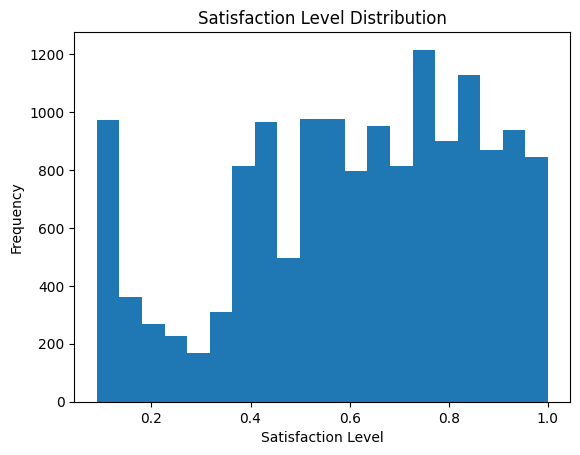

In [128]:
plt.hist(df.satisfaction_level, bins=20)
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.title("Satisfaction Level Distribution");

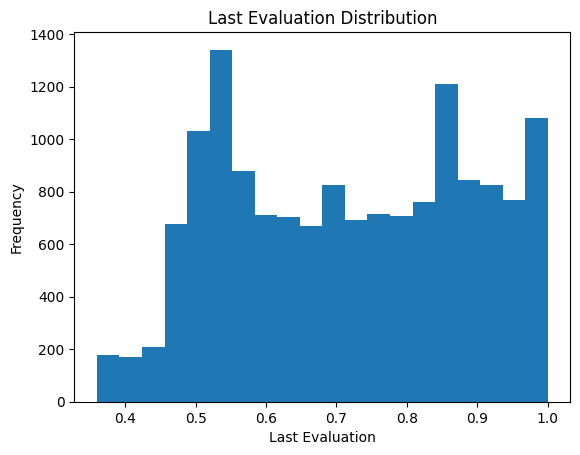

In [129]:
plt.hist(df.last_evaluation, bins=20)
plt.xlabel("Last Evaluation")
plt.ylabel("Frequency")
plt.title("Last Evaluation Distribution");

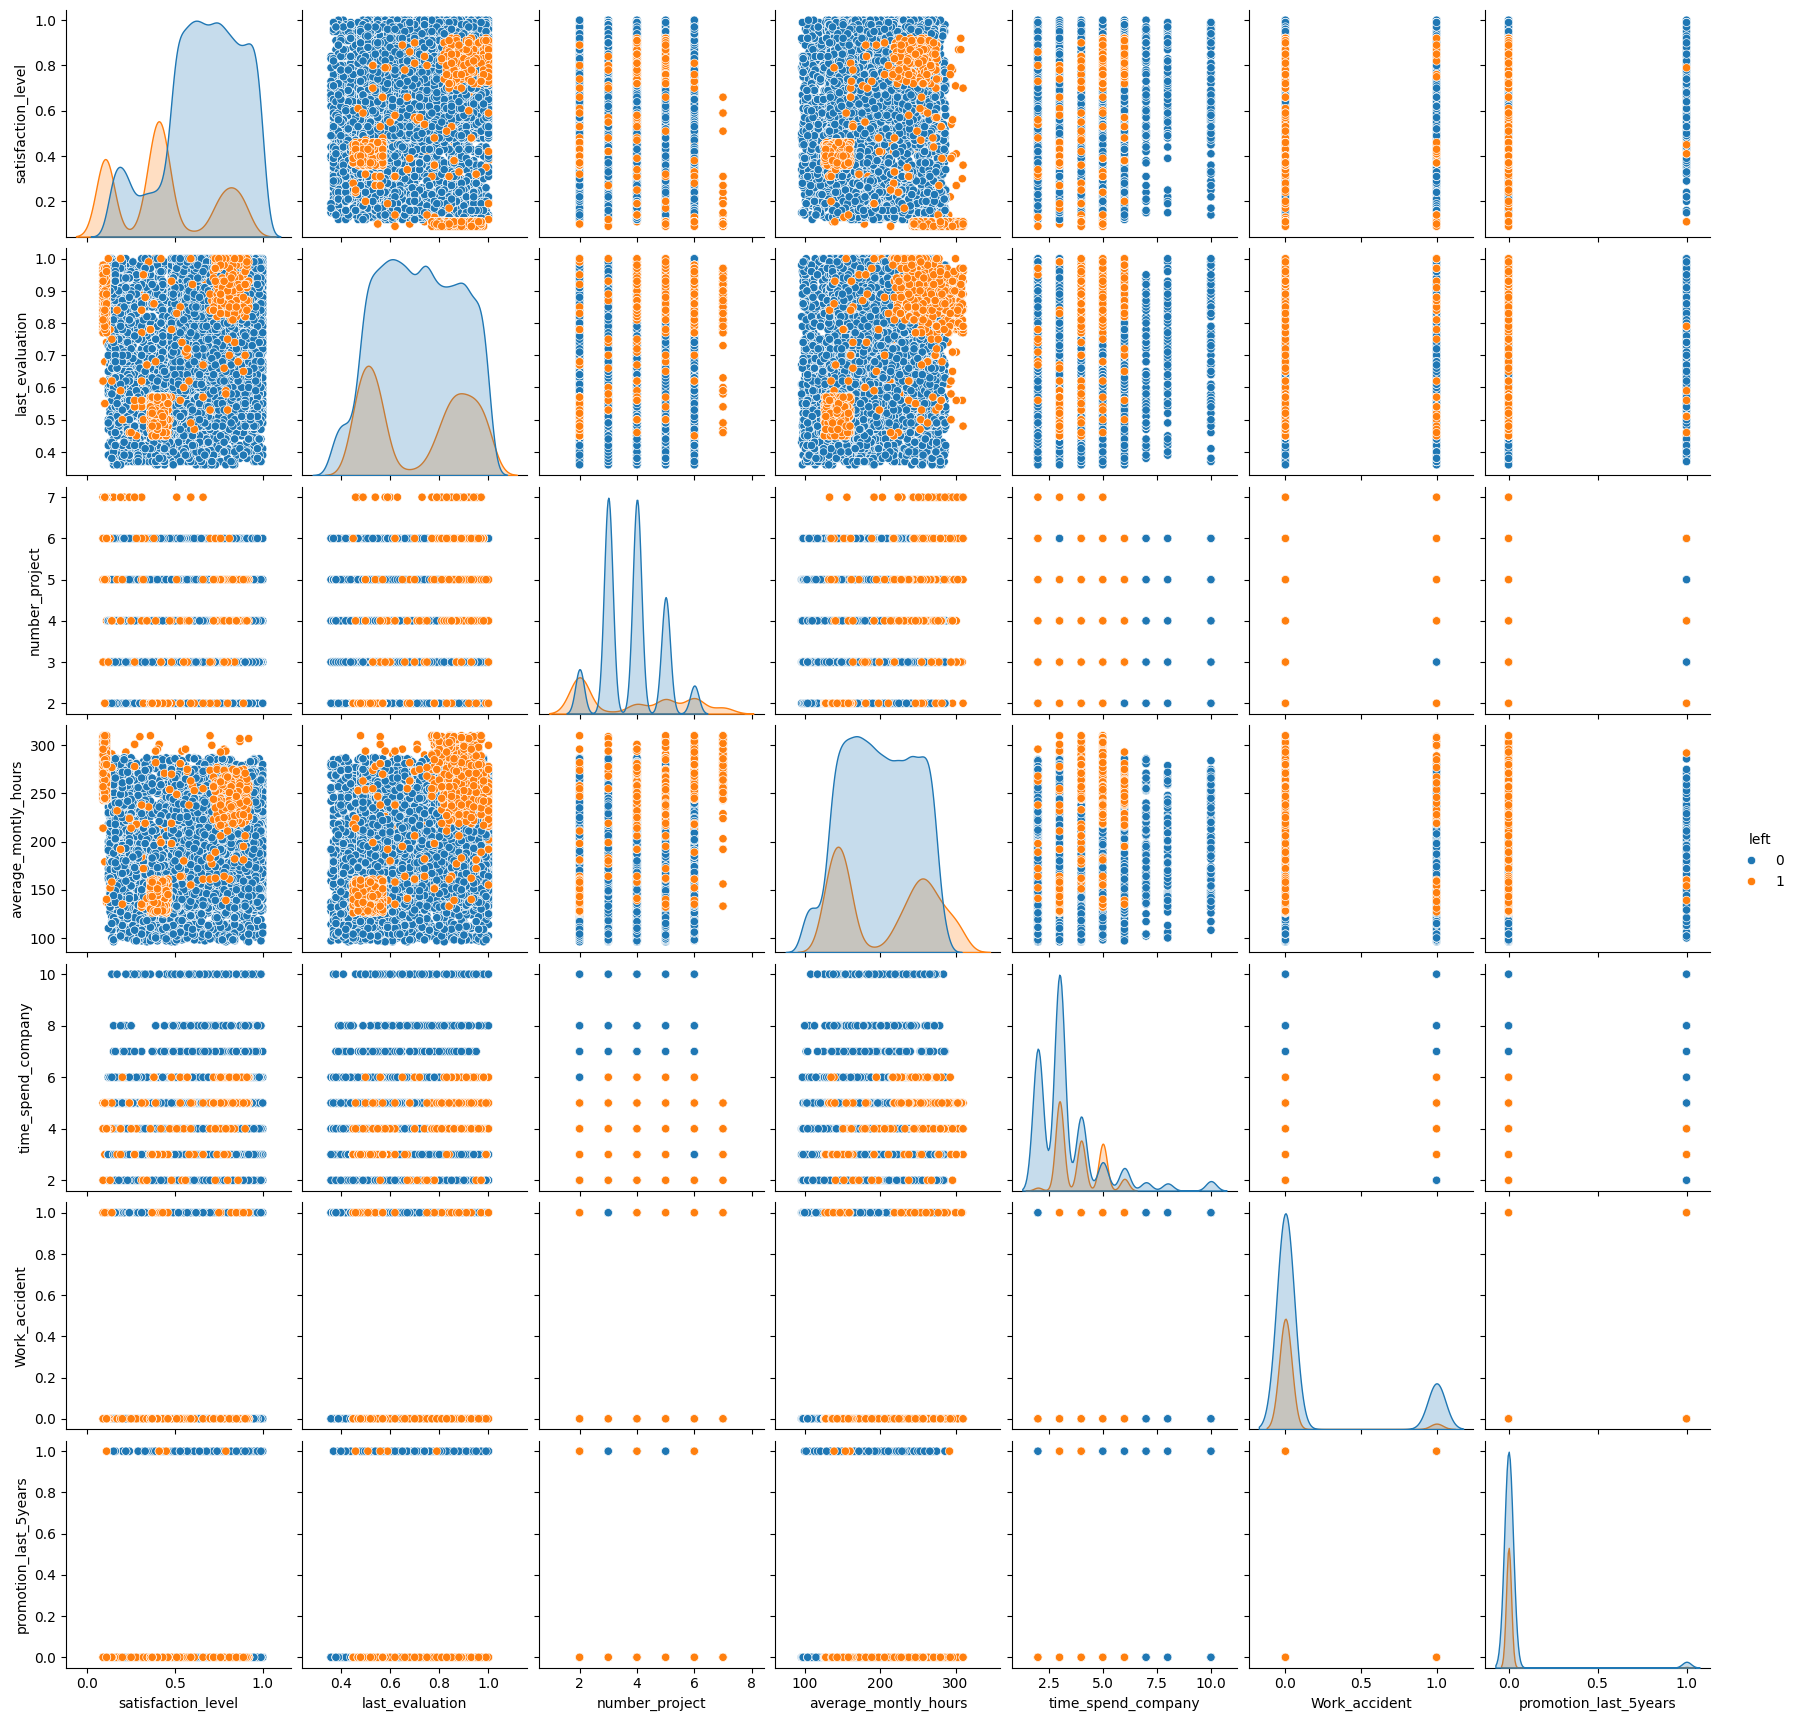

In [130]:
sns.pairplot(df, hue="left");

In [131]:
# Determing Features and target
X = df.drop("left", axis=1)
y = df["left"]

# Checking the correlation between numerical data

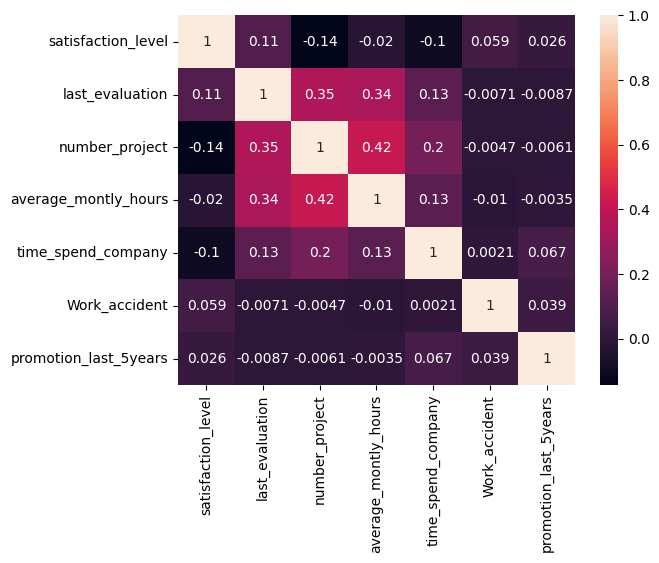

In [132]:
corr = df.select_dtypes("number").drop(columns=["left"]).corr()
sns.heatmap(corr, annot=True);

# Observations
* There is no more than 50% positive relationship between the numerical data

# Handling Categorical Data

In [133]:
dummies_d = pd.get_dummies(X.Department, dtype=int)
dummies_d.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [134]:
X = pd.concat([X, dummies_d], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [135]:
X.drop(columns=["Department"], inplace=True)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,0,1,0,0


In [136]:
from sklearn.preprocessing import OrdinalEncoder
orden = OrdinalEncoder()
X["salary"] = orden.fit_transform(X[["salary"]])
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2.0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0


# Splitting the dataset into training and test set

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 18), (3000, 18), (11999,), (3000,))

# Model Building
* Our problem is a classification problem
* We have to determine whether an employee will leave or not
* We are going to use three most popular and simple model: Logistic Regression, Random Forest Classifier, Decision Tree Classifier

# Logistic Regression

In [138]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [139]:
y_pred = lr.predict(X_test)

In [141]:
lr.score(X_train, y_train)

0.7663971997666472

In [142]:
accuracy_score(y_test, y_pred)

0.7566666666666667

In [143]:
confusion_matrix(y_test, y_pred)

array([[2110,  184],
       [ 546,  160]])

In [145]:
report_lr = classification_report(y_test, y_pred)
print(report_lr)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.30       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



# Random Forest

In [146]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
y_pred_rf = rf.predict(X_test)

In [148]:
rf.score(X_train, y_train)

1.0

In [149]:
accuracy_score(y_test, y_pred_rf)

0.9883333333333333

In [150]:
confusion_matrix(y_test, y_pred_rf)

array([[2285,    9],
       [  26,  680]])

In [151]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# Decision Tree

In [152]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
y_pred_dt = dt.predict(X_test)

In [154]:
dt.score(X_train, y_train)

1.0

In [155]:
accuracy_score(y_test, y_pred_dt)

0.9746666666666667

In [156]:
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.95       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000



# Finalizing the Model
* Logistic Regression is not showing good result
* Decision Tree is showing good result but it's not at the level of Random Forest
* We are going to use Random Forest Model

In [157]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'],
      dtype='object')

In [158]:
def outcome(satisfaction_level, last_evaluation, number_project,
       average_montly_hours, time_spend_company, Work_accident,
       promotion_last_5years, salary, IT, RandD, accounting, hr,
       management, marketing, product_mng, sales, support,
       technical):
  x = np.array([satisfaction_level, last_evaluation, number_project,
       average_montly_hours, time_spend_company, Work_accident,
       promotion_last_5years, salary, IT, RandD, accounting, hr,
       management, marketing, product_mng, sales, support,
       technical])
  result = rf.predict([x])
  if result == 0:
    print("Employee will not leave the company")
  else:
    print("Employee will leave the company")

In [162]:
X_test.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
6723,0.65,0.96,5,226,2,1,0,2.0,0,0,0,0,0,1,0,0,0,0
6473,0.88,0.80,3,166,2,0,0,1.0,1,0,0,0,0,0,0,0,0,0


In [160]:
outcome(0.65, 0.96, 5, 226, 2, 1, 0, 2.0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)

Employee will not leave the company


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [163]:
X_test.tail(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
9939,0.89,0.76,2,278,2,0,0,2.0,0,0,0,0,0,0,0,1,0,0
14346,0.31,0.84,7,133,5,0,0,1.0,0,0,0,0,0,0,0,0,0,1


In [164]:
outcome(0.31, 0.84, 7, 133, 5, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)

Employee will leave the company


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
